### Setup Environment:

In [1]:
# Path to main dir eq: %cd ..
%cd /home/datascience/DF-DM/

/home/datascience/DF-DM


In [2]:
from src.embeddings import load_data, split_dataset, train_and_evaluate_model

# Class weights
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Models
# Random forest
from sklearn.ensemble import RandomForestClassifier
# Logistic regression
from sklearn.linear_model import LogisticRegression
# Support vector machine
from sklearn.svm import SVC
# Decision tree
from sklearn.tree import DecisionTreeClassifier

## Evaluate the Embeddings

In [3]:
def run_experiments(LABELS_PATH, LABEL, EMBEDDINGS_BACKBONE, EMBEDDINGS_DIR, TEST_SIZE, CLASS_WEIGTHS, NORMAL=False, DR_ICDR_3=False):
    
    # Get the dataset
    X, y = load_data(labels_path=LABELS_PATH, backbone=EMBEDDINGS_BACKBONE, label=LABEL, directory=EMBEDDINGS_DIR, normal=NORMAL, DR_ICDR_3=DR_ICDR_3)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = split_dataset(X, y, test_size=TEST_SIZE)

    # Define a list of models to test
    if CLASS_WEIGTHS:
        class_weights = compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)
        # Create a dictionary from class labels and weights
        class_weights = {class_label: weight for class_label, weight in zip(np.unique(y_train), class_weights)}
        print(f'Setting class weigths to: {class_weights}')

        models = [
            #("SVM", SVC(class_weight=class_weights, probability=True)),
            ("Logistic Regression", LogisticRegression(class_weight=class_weights)),
            ('Decision Tree', DecisionTreeClassifier(class_weight=class_weights)),
        ]
    else:
        models = [
            #("SVM", SVC(probability=True)),
            ("Logistic Regression", LogisticRegression())
            ('Decision Tree', DecisionTreeClassifier()),
        ]

    # Run the experiments
    train_and_evaluate_model(X_train, X_test, y_train, y_test, models=models)

#### Constants

In [4]:
# Constants:
LABELS_PATH = '/home/datascience/Retina/datasets/BRSET/labels.csv'
EMBEDDINGS_BACKBONE = 'dinov2_large'
EMBEDDINGS_DIR = 'Embeddings/BRSET/'
TEST_SIZE = 0.3
CLASS_WEIGTHS = True

## Diabetic Retinopathy

### 5 Class

Training set size is: 11386 rows and 1024 columns
Test set size is: 4880 rows and 1024 columns


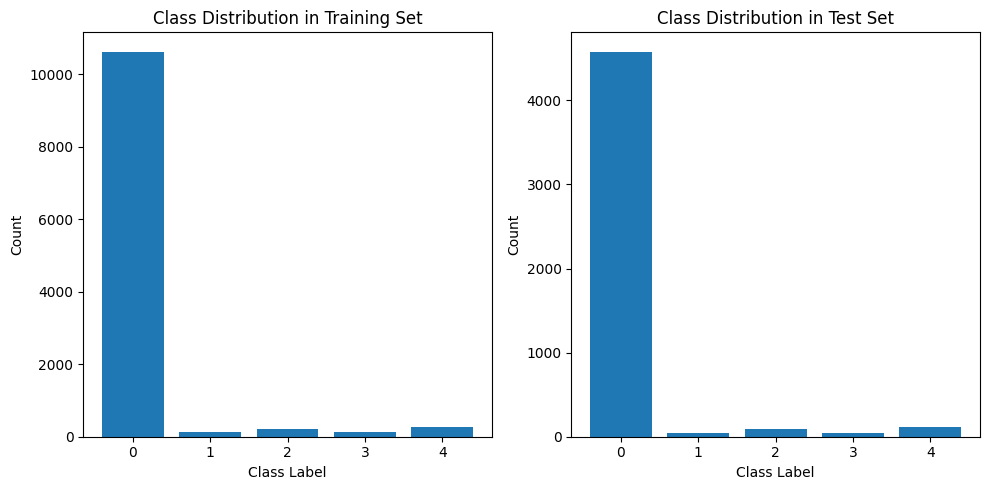

Setting class weigths to: {0: 0.214203743768225, 1: 19.136134453781512, 2: 10.398173515981735, 3: 16.265714285714285, 4: 8.220938628158844}


####################  Logistic Regression  ####################


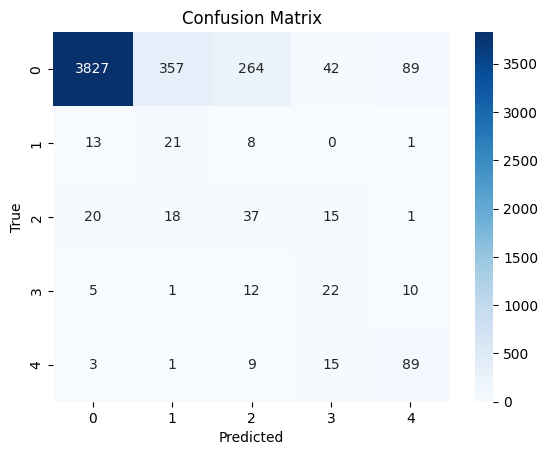

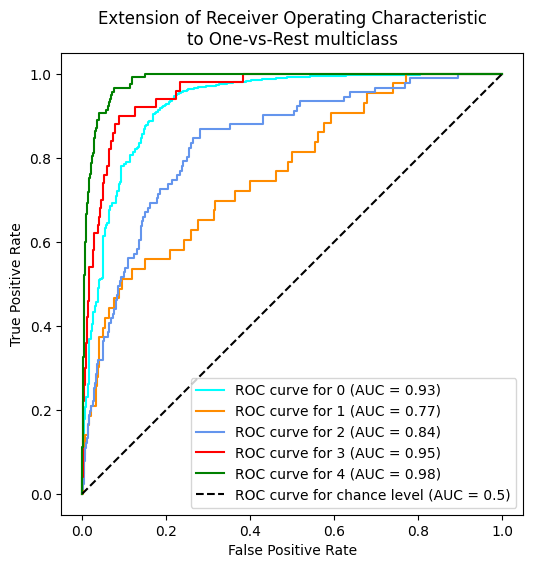

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      4579
           1       0.05      0.49      0.10        43
           2       0.11      0.41      0.18        91
           3       0.23      0.44      0.31        50
           4       0.47      0.76      0.58       117

    accuracy                           0.82      4880
   macro avg       0.37      0.59      0.41      4880
weighted avg       0.94      0.82      0.87      4880

####################  Decision Tree  ####################


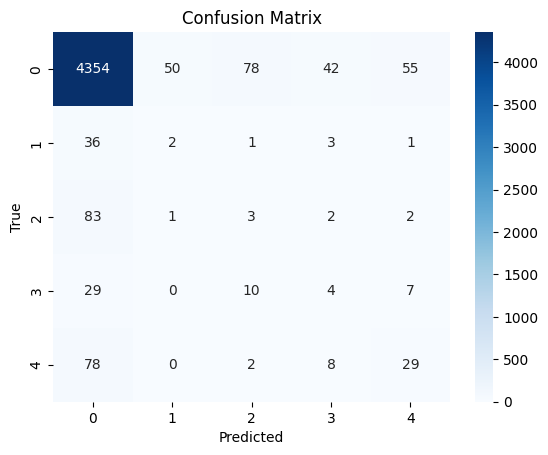

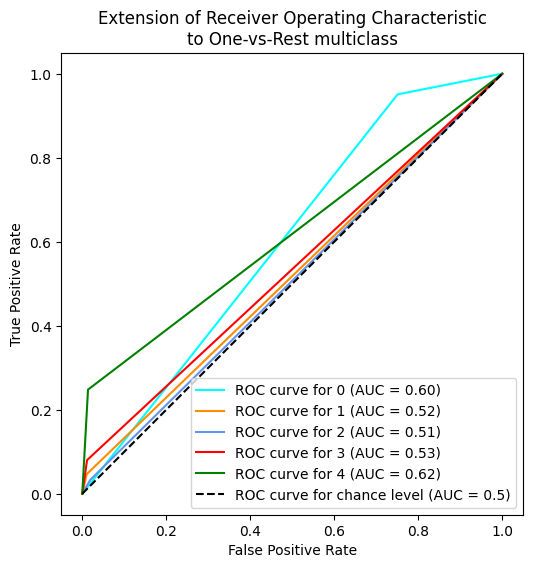

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      4579
           1       0.04      0.05      0.04        43
           2       0.03      0.03      0.03        91
           3       0.07      0.08      0.07        50
           4       0.31      0.25      0.27       117

    accuracy                           0.90      4880
   macro avg       0.28      0.27      0.27      4880
weighted avg       0.90      0.90      0.90      4880



In [5]:
LABEL = 'DR_ICDR'
DR_ICDR_3 = False

run_experiments(LABELS_PATH, LABEL, EMBEDDINGS_BACKBONE, EMBEDDINGS_DIR, TEST_SIZE, CLASS_WEIGTHS, DR_ICDR_3=DR_ICDR_3)

### 3 Class

Training set size is: 11386 rows and 1024 columns
Test set size is: 4880 rows and 1024 columns


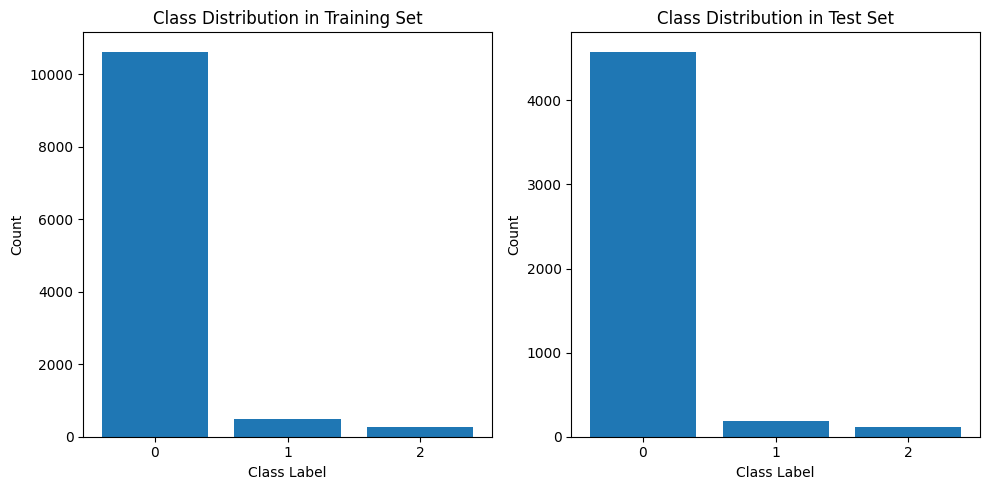

Setting class weigths to: {0: 0.35700623961370836, 1: 7.94002789400279, 2: 13.701564380264742}


####################  Logistic Regression  ####################


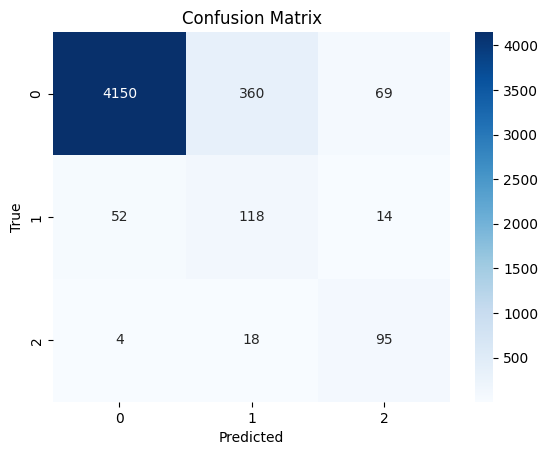

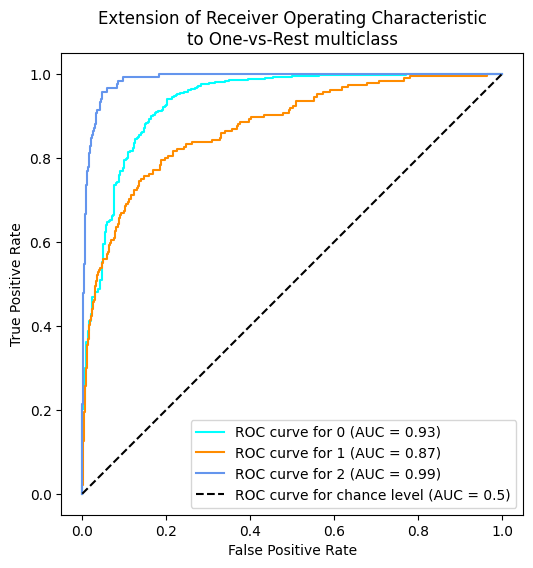

              precision    recall  f1-score   support

           0       0.99      0.91      0.94      4579
           1       0.24      0.64      0.35       184
           2       0.53      0.81      0.64       117

    accuracy                           0.89      4880
   macro avg       0.59      0.79      0.65      4880
weighted avg       0.95      0.89      0.92      4880

####################  Decision Tree  ####################


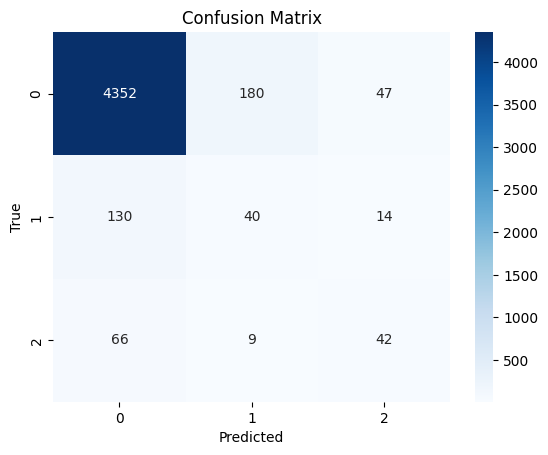

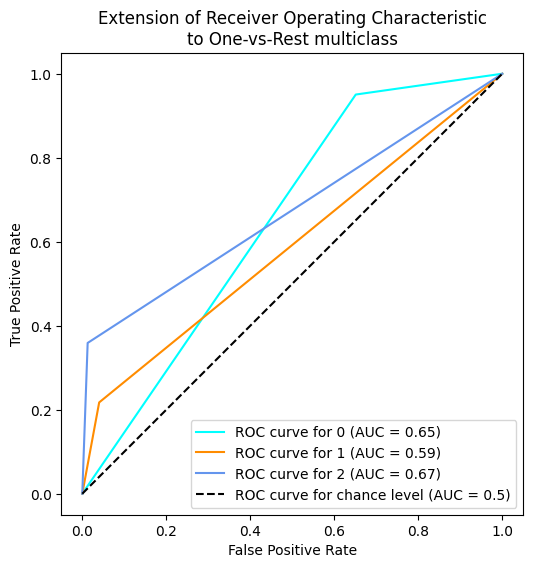

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      4579
           1       0.17      0.22      0.19       184
           2       0.41      0.36      0.38       117

    accuracy                           0.91      4880
   macro avg       0.51      0.51      0.51      4880
weighted avg       0.91      0.91      0.91      4880



In [6]:
LABEL = 'DR_ICDR'
DR_ICDR_3= True

run_experiments(LABELS_PATH, LABEL, EMBEDDINGS_BACKBONE, EMBEDDINGS_DIR, TEST_SIZE, CLASS_WEIGTHS, DR_ICDR_3=DR_ICDR_3)

### 2 Class

Training set size is: 11386 rows and 1024 columns
Test set size is: 4880 rows and 1024 columns


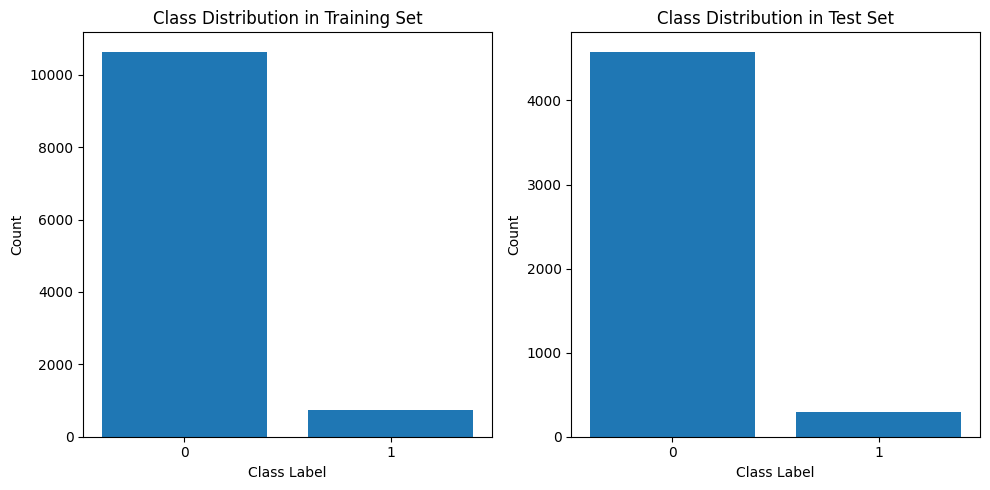

Setting class weigths to: {0: 0.5351066829589247, 1: 7.621151271753681}


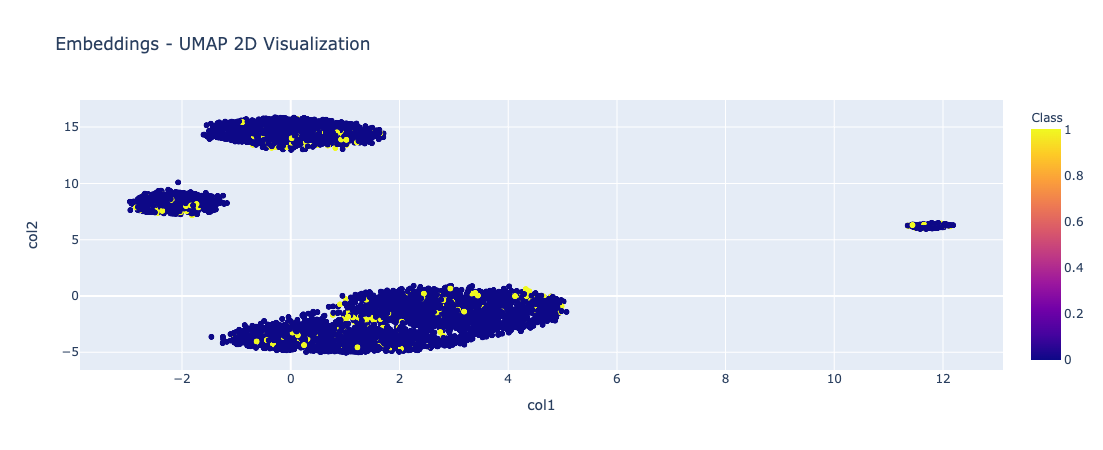

####################  Logistic Regression  ####################


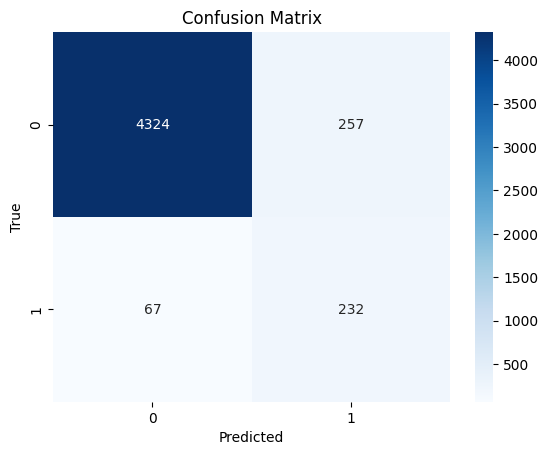

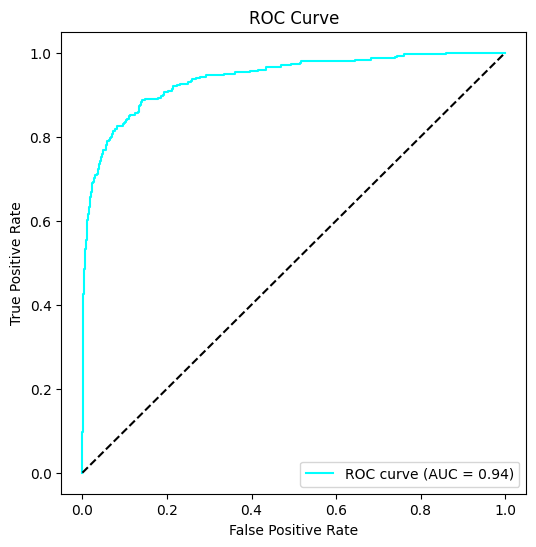

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      4581
           1       0.47      0.78      0.59       299

    accuracy                           0.93      4880
   macro avg       0.73      0.86      0.78      4880
weighted avg       0.95      0.93      0.94      4880

####################  Decision Tree  ####################


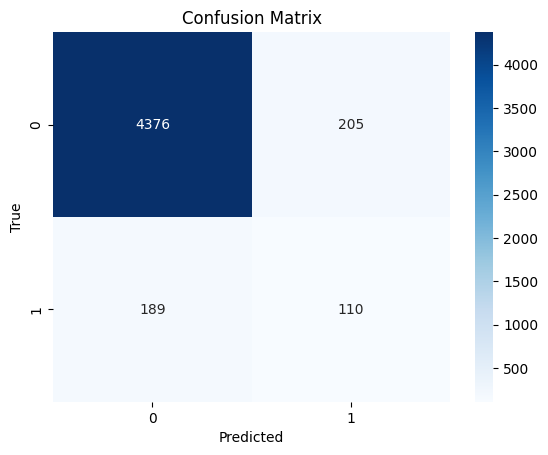

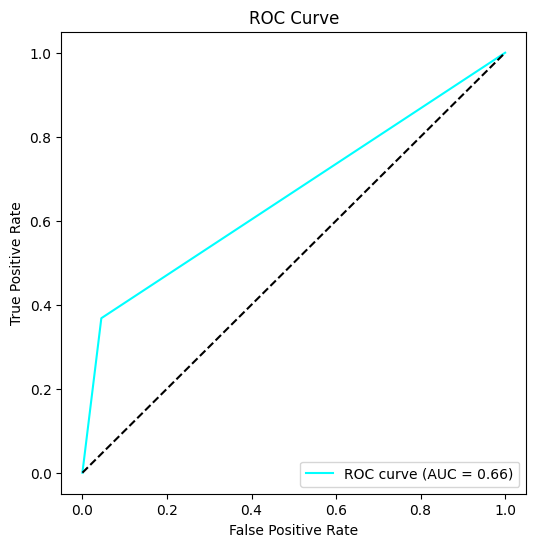

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4581
           1       0.35      0.37      0.36       299

    accuracy                           0.92      4880
   macro avg       0.65      0.66      0.66      4880
weighted avg       0.92      0.92      0.92      4880



In [7]:
LABEL = 'diabetic_retinopathy'
run_experiments(LABELS_PATH, LABEL, EMBEDDINGS_BACKBONE, EMBEDDINGS_DIR, TEST_SIZE, CLASS_WEIGTHS)